In [ ]:
#Data from Hsin-Yu Chen Observational selection effects with ground-based GW detectors 
#http://dx.doi.org/10.3847/1538-4357/835/1/31

In [2]:
%matplotlib inline
import healpy as hp
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import astropy
import sys
from astropy.io import fits
from astropy.utils.data import download_file
from astropy.table import Table
import matplotlib.cm as cm
import math

In [3]:
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

In [4]:
#Color scale for maps
cool_cmap = cm.jet
cool_cmap.set_under("w")

In [5]:
#Read data
t = Table.read('../BNS-MergerRates/skyprior_cbc_hl.fits')
print(t)

       I [1024]       
----------------------
   2.02123 .. 0.586845
   1.42039 .. 0.222135
   1.11351 .. 0.211349
0.550547 .. 0.00805733
  0.947417 .. 0.148804
  0.702658 .. 0.531893
 0.201161 .. 0.0642517
  0.143365 .. 0.671351
  0.684317 .. 0.163496
 0.194145 .. 0.0757354
                   ...
   1.94901 .. 0.429761
   1.21823 .. 0.272729
  0.66232 .. 0.0980084
  0.694768 .. 0.935579
   1.02882 .. 0.751523
   0.554647 .. 1.14569
    0.954589 .. 1.2316
  0.722484 .. 0.325029
  0.256832 .. 0.130851
  0.748428 .. 0.865188
  0.324486 .. 0.572141
Length = 192 rows


In [5]:
chenMap=hp.read_map('../BNS-MergerRates/skyprior_cbc_hl.fits')

NSIDE = 128
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


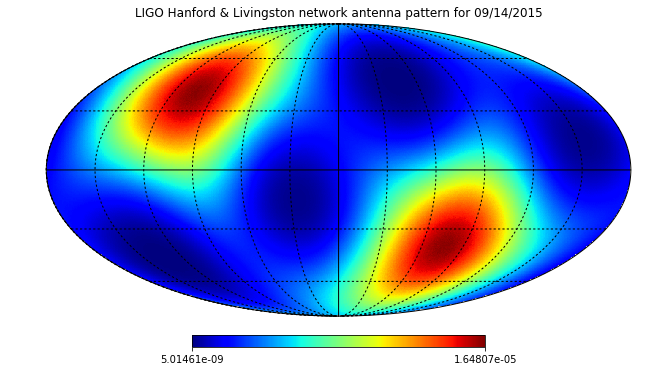

In [6]:
#Map of antenna pattern September 14 2015 at 00:29
hp.mollview(chenMap/sum(chenMap), title="LIGO Hanford & Livingston network antenna pattern for 09/14/2015",flip='geo',cmap=cool_cmap)
hp.graticule()

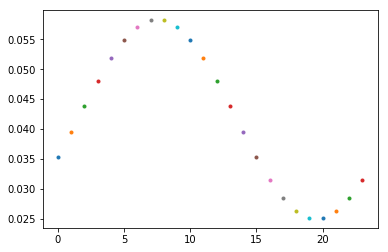

In [6]:
#Probability of operation for daily cycle, assuming 50% of 
time=np.arange(24)
fig=plt.figure()
ax=fig.add_subplot(111)
for i in time:
    p=(1+0.4*math.sin((2*np.pi*i/24)-(np.pi/8)))/24
    ax.plot(i,p,'.')
plt.show()

In [ ]:
################ Ploting in matplotlib to look at grid

In [6]:
rotatedMap1=hp.read_map("skyprior_cbc_hl_2017may_sin0.400_0.125pi_fine_twilight.fits")

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


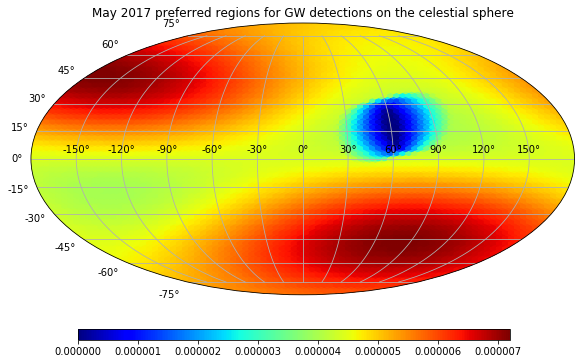

In [26]:
"""r=hp.rotator.Rotator(coord=['G','C'],deg=True)
theta_gal=np.zeros(10000)
phi_gal=np.arange(0,360*2,360*2/10000)
theta,phi=r(theta_gal,phi_gal,lonlat=True)
ix=np.where(phi>180)[0]
phi[ix]=phi[ix]-2*180"""

pixnum=np.arange(hp.nside2npix(128))
theta1,phi1=hp.pix2ang(128,pixnum)
ra=phi1
ix=np.where(phi1>np.pi)[0]
ra[ix]=ra[ix]-2*np.pi
#ra=-1*ra
#ra=ra+np.pi
#ix=np.where(ra>np.pi)[0]
#ra[ix]=ra[ix]-np.pi
dec=(np.pi/2-theta1)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection="mollweide")
plt.grid(True)
ax.set_title("May 2017 preferred regions for GW detections on the celestial sphere")
hb=ax.hexbin(ra,dec,C=rotatedMap1,cmap=cool_cmap)
cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))

In [ ]:
########################## Map of rates (128 resolution)

In [7]:
rateMap=hp.read_map("rateMapK128.fits")

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


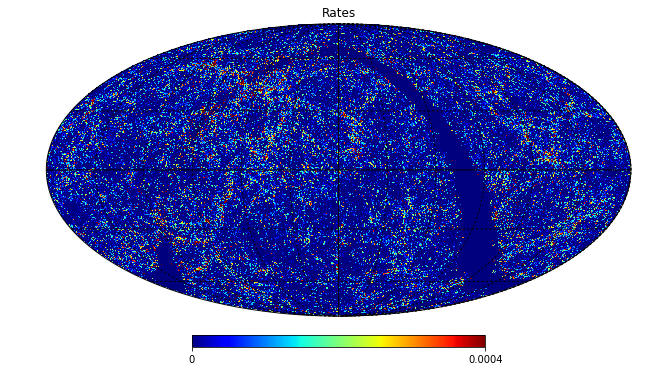

In [9]:
hp.mollview(rateMap, title="Rates",max=0.0004,cmap=cool_cmap,return_projected_map=True)
hp.graticule()

In [ ]:
######################## Creating maps for every month

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


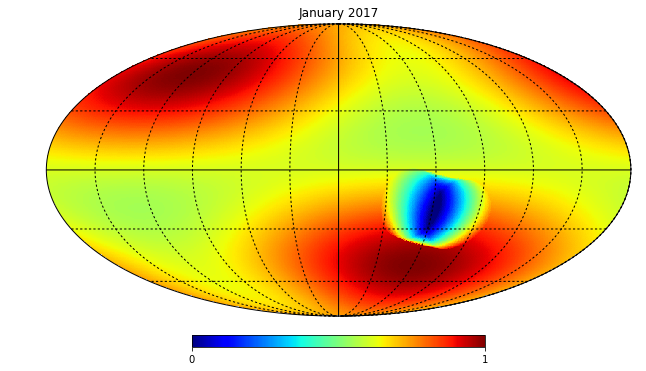

In [10]:
janMap=hp.read_map("skyprior_cbc_hl_2017jan_sin0.400_0.125pi_fine_twilight.fits")
hp.mollview(janMap/max(janMap),title="January 2017",cmap=cool_cmap)
hp.graticule()

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


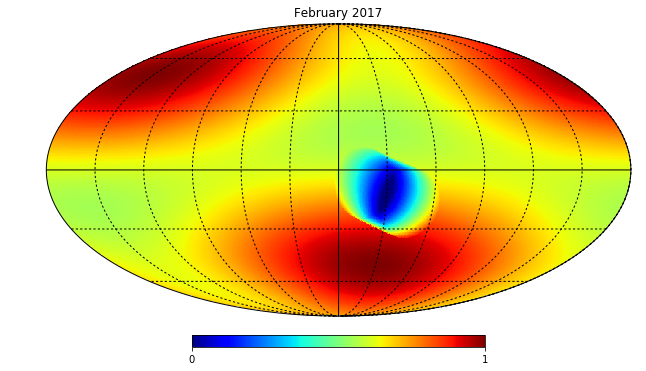

In [11]:
febMap=hp.read_map("skyprior_cbc_hl_2017feb_sin0.400_0.125pi_fine_twilight.fits")
hp.mollview(febMap/max(febMap),title="February 2017",cmap=cool_cmap)
hp.graticule()

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


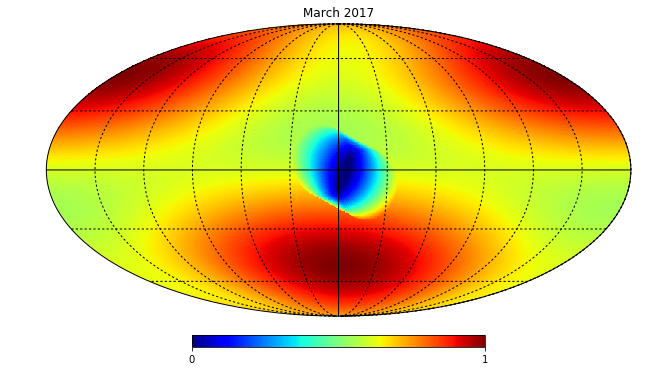

In [12]:
marMap=hp.read_map("skyprior_cbc_hl_2017mar_sin0.400_0.125pi_fine_twilight.fits")
hp.mollview(marMap/max(marMap),title="March 2017",cmap=cool_cmap)
hp.graticule()

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


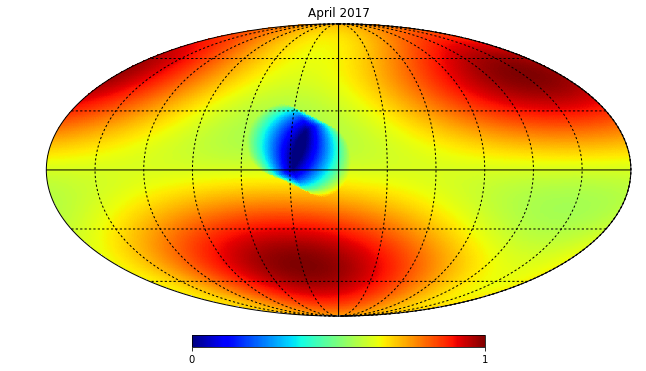

In [13]:
aprMap=hp.read_map("skyprior_cbc_hl_2017apr_sin0.400_0.125pi_fine_twilight.fits")
hp.mollview(aprMap/max(aprMap),title="April 2017",cmap=cool_cmap)
hp.graticule()

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


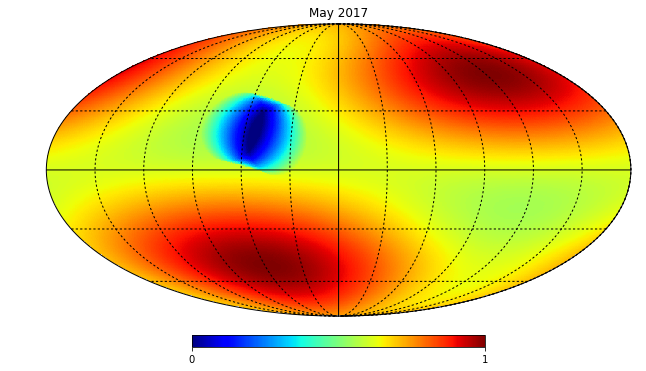

In [14]:
mayMap=hp.read_map("skyprior_cbc_hl_2017may_sin0.400_0.125pi_fine_twilight.fits")
hp.mollview(mayMap/max(mayMap),title="May 2017",cmap=cool_cmap)
hp.graticule()

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


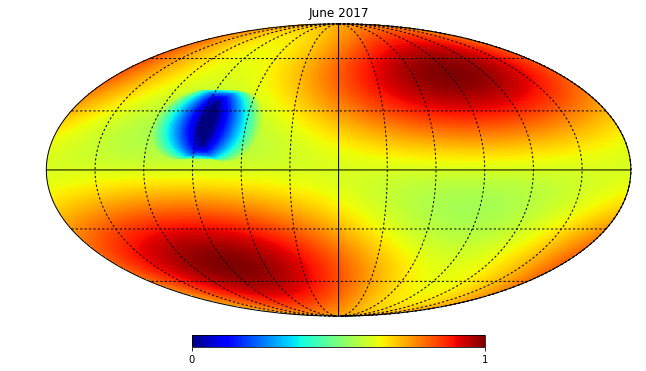

In [15]:
junMap=hp.read_map("skyprior_cbc_hl_2017jun_sin0.400_0.125pi_fine_twilight.fits")
hp.mollview(junMap/max(junMap),title="June 2017",cmap=cool_cmap)
hp.graticule()

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


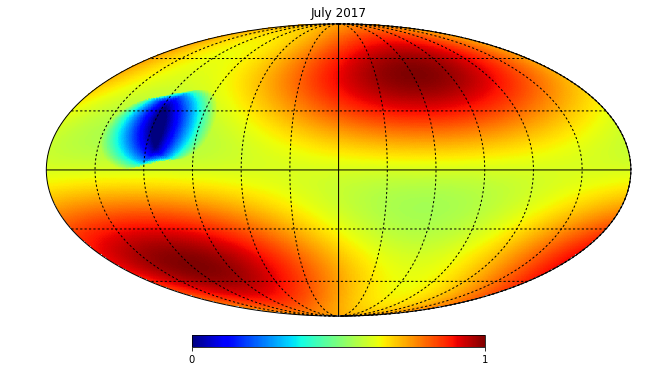

In [16]:
julMap=hp.read_map("skyprior_cbc_hl_2017jul_sin0.400_0.125pi_fine_twilight.fits")
hp.mollview(julMap/max(julMap),title="July 2017",cmap=cool_cmap)
hp.graticule()

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


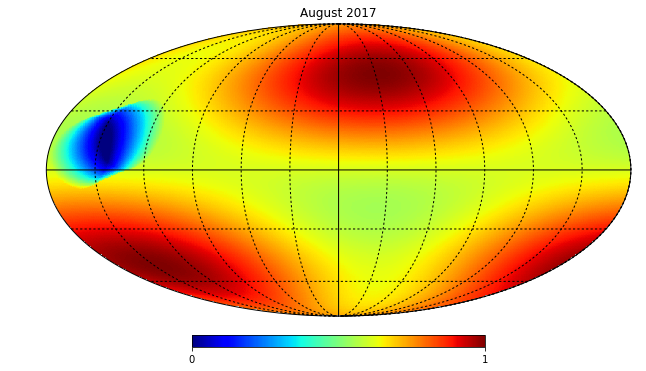

In [17]:
augMap=hp.read_map("skyprior_cbc_hl_2017aug_sin0.400_0.125pi_fine_twilight.fits")
hp.mollview(augMap/max(augMap),title="August 2017",cmap=cool_cmap)
hp.graticule()

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


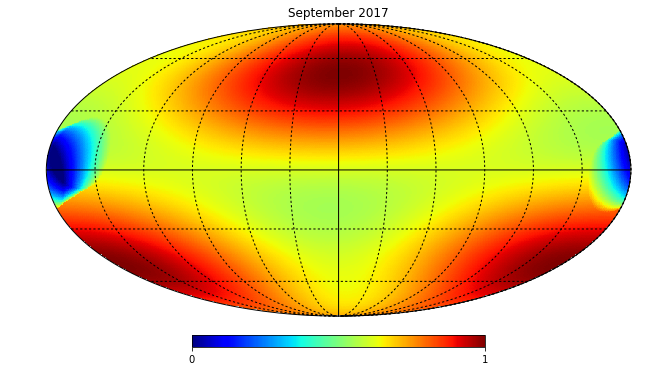

In [18]:
sepMap=hp.read_map("skyprior_cbc_hl_2017sep_sin0.400_0.125pi_fine_twilight.fits")
hp.mollview(sepMap/max(sepMap),title="September 2017",cmap=cool_cmap)
hp.graticule()

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


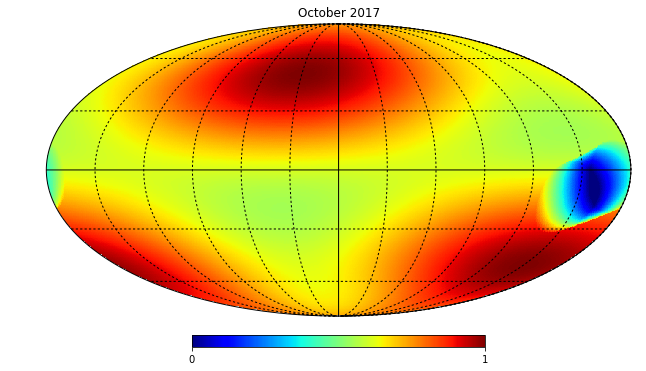

In [19]:
octMap=hp.read_map("skyprior_cbc_hl_2017oct_sin0.400_0.125pi_fine_twilight.fits")
hp.mollview(octMap/max(octMap),title="October 2017",cmap=cool_cmap)
hp.graticule()

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


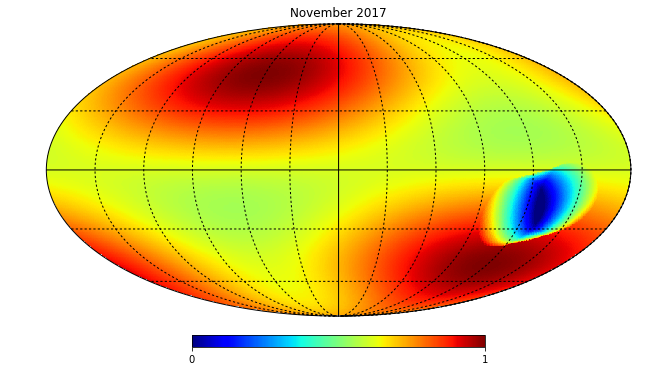

In [20]:
novMap=hp.read_map("skyprior_cbc_hl_2017nov_sin0.400_0.125pi_fine_twilight.fits")
hp.mollview(novMap/max(novMap),title="November 2017",cmap=cool_cmap)
hp.graticule()

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


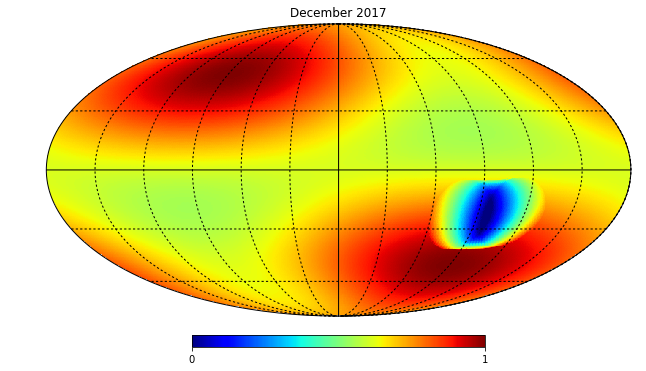

In [21]:
decMap=hp.read_map("skyprior_cbc_hl_2017dec_sin0.400_0.125pi_fine_twilight.fits")
hp.mollview(decMap/max(decMap),title="December 2017",cmap=cool_cmap)
hp.graticule()

In [ ]:
#################### Calculating observable rates

In [22]:
rateJan=rateMap*(1/12)*janMap/max(janMap)
rateFeb=rateMap*(1/12)*febMap/max(febMap)
rateMar=rateMap*(1/12)*marMap/max(marMap)
rateApr=rateMap*(1/12)*aprMap/max(aprMap)
rateMay=rateMap*(1/12)*mayMap/max(mayMap)
rateJun=rateMap*(1/12)*junMap/max(junMap)
rateJul=rateMap*(1/12)*julMap/max(julMap)
rateAug=rateMap*(1/12)*augMap/max(augMap)
rateSep=rateMap*(1/12)*sepMap/max(sepMap)
rateOct=rateMap*(1/12)*octMap/max(octMap)
rateNov=rateMap*(1/12)*novMap/max(novMap)
rateDec=rateMap*(1/12)*decMap/max(decMap)
observableRate=rateJan+rateFeb+rateMar+rateApr+rateMay+rateJun+rateJul+rateAug+rateSep+rateOct+rateNov+rateDec

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


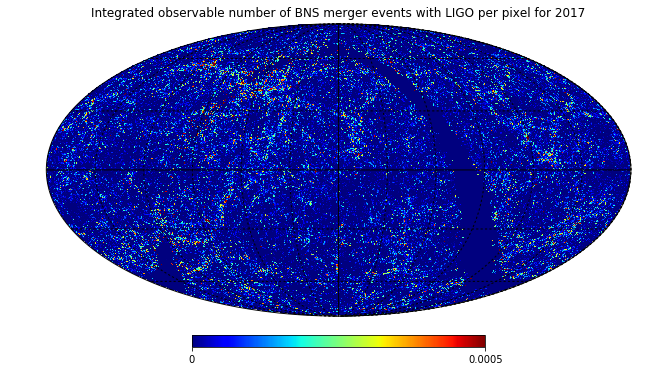

In [31]:
hp.mollview(observableRate, title="Integrated observable number of BNS merger events with LIGO per pixel for 2017",max=0.0005,cmap=cool_cmap,return_projected_map=True)
hp.graticule()
plt.show()

In [32]:
sum(observableRate)

6.3014703628067439